<a href="https://colab.research.google.com/github/AtharvaKitkaru/multilabel-classifier-for-darkweb-sites/blob/master/Multilabel_Classification_Generic_Hidden_Data_Wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# !unzip -u "/content/drivedrive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/media.zip" -d "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media"

In [ ]:
%%capture
!pip install contractions

In [ ]:
import ast
import codecs
import datetime
import math
import os
import re
import smtplib
import string
import time
from ast import literal_eval
from collections import Counter

import contractions
import gensim
import lxml
import nltk
import numpy as np
import pandas as pd
import requests
import scipy
import seaborn as sns
import spacy
from bs4 import BeautifulSoup
from lxml.html.clean import Cleaner
from matplotlib import font_manager
from matplotlib import pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from numpy.linalg import norm
from wordcloud import WordCloud

from tqdm.auto import tqdm
tqdm.pandas()

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
nltk.download(['punkt', 'stopwords', 'wordnet', 'words'], quiet = True)

True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# font_manager.fontManager.addfont('/content/Inter-Regular.ttf')
# sns.set_theme(
#     context='paper',
#     font='Inter',
#     rc={
#         'figure.dpi': 300
#     }
# )
# def sinplot(flip=1):
#     x = np.linspace(0, 14, 100)
#     for i in range(1, 7):
#         plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
# sinplot()


# Data preparation

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
stop = set(stopwords + list(string.punctuation))

In [ ]:
start = '<style type="text/css">'
end = "</style>"

In [ ]:
cleaner = Cleaner()
cleaner.javascript = True # This is True because we want to activate the javascript filter
cleaner.style = True

already extracted text, so currently we dont need the 2 cells below

In [ ]:
df=pd.DataFrame(columns=["folder_name","file_name","Text"])

In [ ]:
Q=os.listdir("/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/")
for i in range(0,len(Q)):
    files=os.listdir("/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/"+Q[i])
    for f in files:
        if f.endswith(".html"):
            Url=str("/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/"+Q[i]+"/"+f)
            header = {'Referer': Url,
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'
            }
            print(Url)
            files = codecs.open(Url, "r", "ISO-8859-1")
            Soup1=BeautifulSoup(files.read())
            text = Soup1.get_text()
            Soup1=str(Soup1)
            # print(Soup1)

            soup = BeautifulSoup(Soup1, "html.parser")
            text2 = ''

            # print('soup:',soup)
            t = soup.findAll('title')
            # print('t:',t)
            for title in t:
              text2 += ' ' + title.text
            # b , em , footer , span , th, u

            h1 = soup.findAll('h1')
            for h in h1:
              text2 +=  ' ' + h.text

            h2 = soup.findAll('h2')
            for h in h2:
              text2 += ' ' + h.text

            h3 = soup.findAll('h3')
            for h in h3:
              text2 +=  ' ' + h.text

            h4 = soup.findAll('h4')
            for h in h4:
              text2 +=  ' ' + h.text

            p = soup.findAll('p')
            for h in p:
              text2 +=  ' ' +  h.text

            title = soup.findAll("meta", property="title")
            for h in title:
              text2 +=  ' ' +  h.text

            description = soup.findAll("meta", property="description")
            for h in description:
              text2 +=  ' ' +  h.text

            title = soup.findAll("meta", property="og:title")
            for h in title:
              text2 +=  ' ' +  h.text

            description = soup.findAll("meta", property="og:description")
            for h in description:
              text2 +=  ' ' +  h.text

            tag = soup.findAll("meta", property="article:tag")
            for h in tag:
              text2 +=  ' ' +  h.text

            # em = soup.findAll('em')
            # for h in em:
            #   text2 +=  ' ' + h.text

            # b = soup.findAll('b')
            # for h in b:
            #   text2 +=  ' ' + h.text

            # u = soup.findAll('u')
            # for h in u:
            #   text2 +=  ' ' + h.text

            # span = soup.findAll('span')
            # for h in span:
            #   text2 +=  ' ' + h.text

            # footer = soup.findAll('footer')
            # for h in footer:
            #   text2 +=  ' ' + h.text

            # th = soup.findAll('th')
            # for h in th:
            #   text2 +=  ' ' + h.text
            #tags we want to fetch data from :
            # title, h , p


            # text = text.replace(Soup1[Soup1.find(start)+len(start):Soup1.rfind(end)],"")
            # print('text2:',text2)
            text = str(text2.strip())
            text_processed=[t for t in word_tokenize(text.lower()) if t not in stop]
            # print('text processed:',text_processed)
            df.loc[len(df)]=[Q[i],f," ".join(text_processed)]

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/C4F71DE1EDDCB0j92L3CF7n9C5D8C.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/1DB13pF9B996D5BDGB95C00A7AD4.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/BFG128D927BEB0DF64EA0899A22.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/A0Jo21BEF793081C8D3B10AD10B9A.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/L2p08803D8E4A3BD5KC7CA9AC0.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.faceb

In [ ]:
# df

In [ ]:
# df.to_csv('temp.csv')

In [ ]:
# df = pd.read_csv('temp.csv')
# df.drop('Unnamed: 0',axis = 1,inplace = True)
# df = df[df['Text'].notna()]
# df = df[df['Text'] != '']

In [ ]:
df[['file_name','page']]

In [ ]:
words = set(nltk.corpus.words.words())

In [ ]:
stopset = stopwords.words('english') + list(string.punctuation)

In [ ]:
sent = "this is a sentence café a ofc nope Comment ça va de \x88í\x95\x98ê¸°ì\x9d´ë\x8f\x99ì\x9d"
sent = sent.encode("ascii", "ignore")
sent = sent.decode()
word_list = set(word_tokenize(sent))
temp = ''
for word in word_list:
  word = word.lower()
  if (len(word)>=3) and (word in words) and (word not in stopset):
    temp = temp + ' '+ word
temp = temp.strip()
temp

In [ ]:
for i in range(0,len(df)):
  sent = df.iloc[i,2]
  print(sent)
  sent = sent.encode("ascii", "ignore")
  sent = sent.decode()
  word_list = word_tokenize(sent)
  # print('original sent',sent)
  temp = ''
  for word in word_list:
    word = word.lower()
    if (len(word)>3) and (word in words) and (word not in stopset):
      temp = temp + ' '+ word
  temp = temp.strip()
  # print('mod sent',sent)
  df.iloc[i,2] = temp
  # print('modified sent',df.iloc[i,2])

In [ ]:
excluded_tags = { "ADV"}
nlp = spacy.load('en_core_web_sm')

In [ ]:
for i in range(len(df)):
  sent = df.iloc[i,2]
  temp = ''
  for token in nlp(sent):
    if token.pos_ not in excluded_tags:
      temp = temp + ' '+ token.text
  temp = temp.strip()
  df.iloc[i,2] = temp

In [ ]:
# for i in range(len(df)):
#   sent = df.iloc[i,2]
#   word_list = set(word_tokenize(sent))
#   # print('original sent',sent)
#   for word in word_list:
#     if (len(word)<3):
#       sent = sent.replace(word,'')
#   sent = sent.strip()
#   sent = sent.replace('  ',' ')
#   # print('mod sent',sent)
#   df.iloc[i,2] = sent
#   # print('modified sent',df.iloc[i,2])

In [ ]:
df = df[df['Text'].notna()]

In [ ]:
df = df[df['Text'] != '']

In [ ]:
df

In [ ]:
len(df.iloc[:,0])

In [ ]:
df.to_csv('temp3.csv')

# TF-IDF

In [ ]:
text_req=df["Text"].to_list()

In [ ]:
text_req

In [ ]:
def tf_idf(corpus,document):
    total_docs=len(corpus)
    # print(total_docs)
    doc_set=corpus[document].split(" ")
    # print(total_docs)
    # print(doc)
    words = corpus[document].split()
    wfreq=[words.count(w) for w in words]
    tf_idf=dict(zip(words,wfreq))
    # print(tf_idf)
    for term in doc_set:
      if term:
          tf_idf[term]=1+math.log2(tf_idf[term])
          # print('indi word:',term)
      # print(tf_idf)
          idf_docs = []
          # idf_docs=[w for w in corpus if i in w]
          for doc in corpus:
            # print('doc',doc)
            if term in doc:
              idf_docs.append(doc)
          tf_idf[term]=math.log2(total_docs/len(idf_docs))*tf_idf[term]
    return tf_idf

In [ ]:
weights = []

In [ ]:
for i in range(0,df.shape[0]):
  # print(i)
  dict_tfidf= tf_idf(text_req,i)
  # print(dict_tfidf)
  weights.append(dict_tfidf)

In [ ]:
# len(weights)

In [ ]:
df['weights'] = weights

In [ ]:
df.to_csv('temp4.csv')

In [ ]:
# path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [ ]:
# path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data2.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [ ]:
# df = pd.read_csv('temp4.csv')

In [ ]:
# df.drop('Unnamed: 0',axis = 1,inplace = True)

# Extracting potential labels

In [ ]:
# extracted_labels = []

In [ ]:
def extract_labels(row):
  # print(row)
  if  isinstance(row, str):
    row = ast.literal_eval(row)

  temp = sorted(row.items(), key=lambda x: x[1], reverse=True)
  # print(temp)
  labels = []
  if len(temp) <= 6:
    no_iter = 6
  if len(temp) >= 20:
    no_iter = 0.45 * len(temp)
  else:
    no_iter = 0.7 * len(temp)
  i = 1
  for item in temp:
    labels.append(item[0])
    if i >= no_iter:
      break
    i = i + 1
  return labels


In [ ]:
df['extracted_labels'] = df['weights'].progress_apply(extract_labels)

  0%|          | 0/25355 [00:00<?, ?it/s]

In [ ]:
# len(extracted_labels)

In [ ]:
# df['extracted_labels'] = extracted_labels

In [ ]:
df['extracted_labels'][0]

In [ ]:
path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data4.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [ ]:
df

# Generalizing keywords into labels

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data4.csv')

In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
def tokenize(text):
  # text = literal_eval(text)
  # text = ' '.join(text)
  text = text.lower()
  text = contractions.fix(text)
  tokens = []
  for token in word_tokenize(text):
    if token not in stopwords and token.isalpha():
      tokens.append(token)

  return tokens

# df = pd.read_csv('/content/drive/MyDrive/preprocessed-data2.csv', usecols=['Text', 'extracted_labels'])
# df['labels'] = df.extracted_labels.apply(literal_eval)
df.rename({"Text": 'page'}, axis=1, inplace=True)
# df.drop(['extracted_labels'], axis=1, inplace=True)
import multiprocessing
WORKERS = multiprocessing.cpu_count()
w2v= gensim.models.Word2Vec(size=300, window=5, min_count=1, workers=WORKERS)

# inp = df.apply(lambda i: tokenize(i['page'] + ' ' + " ".join(i['labels'])), axis=1)
inp = df['page'].apply(tokenize)

w2v.build_vocab(inp)
total_examples = w2v.corpus_count
w2v.intersect_word2vec_format('/content/drive/MyDrive/Stance Detection from Text/Saved models/GoogleNews.bin', binary=True, lockf=1.0)

w2v.train(inp, total_examples=total_examples, epochs=5)

# w2v = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/stance_detection/GoogleNews-vectors-negative300.bin', binary=True)
EMBEDDING_DIM = 300

In [ ]:
import gensim.downloader as api

In [ ]:
print(api.load("fasttext-wiki-news-subwords-300", return_path=True))

/root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz


In [ ]:
# !mkdir -p /root/gensim-data/fasttext-wiki-news-subwords-300/

In [ ]:
# !cp /root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/'
!cp  '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/fasttext-wiki-news-subwords-300.gz' /root/gensim-data/fasttext-wiki-news-subwords-300/

In [ ]:
ft =  api.load('fasttext-wiki-news-subwords-300')

In [ ]:
np.dot(ft['government'],ft['politics'])/(norm(ft['government'])*norm(ft['politics']))

0.6019239

In [ ]:
# w2v.wv.save('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/word2vec.wordvectors')

In [ ]:
# w2v = gensim.models.KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [ ]:
df = df[df.apply(lambda row: len(row['page']) > 0 , axis=1)]

In [ ]:
w2v.most_similar('onion')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('layer', 0.5450720191001892),
 ('routing', 0.5262554883956909),
 ('potatoes', 0.5084502696990967),
 ('domain', 0.500737190246582),
 ('asparagus', 0.49993696808815),
 ('potato', 0.4806888997554779),
 ('router', 0.4744889736175537),
 ('tomato', 0.4668031334877014),
 ('yapp', 0.45573604106903076),
 ('destination', 0.45136767625808716)]

In [ ]:
# text = ' '
# for i in df['extracted_labels']:
#   for j in i:
#     text = text +' ' + j

In [ ]:
# wordcloud_spam = WordCloud(background_color="black", max_words=300).generate(text)

# # Lines 2 - 5
# plt.figure(figsize = (20,20))
# plt.imshow(wordcloud_spam, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
output_tokens = [
    'agriculture',
    'banking',
    'blockchain',
    'business',
    'crime',
    'cryptocurrency',
    'economy',
    'education',
    'entertainment',
    'environment',
    'fashion',
    'finance',
    'food',
    'governance',
    'health',
    'network',
    'politics',
    'security',
    'software',
    'sport',
    'technology',
    'web',
]

# cyberseclist = ['hacker','hacking','firewall','antivirus','crptography','encryption','decryption','skimmer']
ecomlist = ['ship', 'shipping', 'shipped', 'shipment', 'sell', 'buy']

def generalizeTokens(tokens):
  output = []
#   tokens = literal_eval(tokens)
#   print('tokens',tokens)
  for token in tokens:
    # print('token',token)
    solution = 0
    solution_token = None
    if token.lower() in {'onion', 'tor'}:
      output.append('network')
    #   continue
    if token.lower() in ecomlist:
      output.append('commerce')
    #   continue

    for matchToken in output_tokens:
    #   print('matchtoken',matchToken)
      try:
        # t = scipy.spatial.distance.cosine(w2v[matchToken], w2v[token])
        # t = w2v.wv.similarity(w2v[matchToken], w2v[token])
        # t = np.dot(w2v[matchToken],w2v[token])/(norm(w2v[matchToken])*norm(w2v[token]))
        t = np.dot(ft[matchToken],ft[token])/(norm(ft[matchToken])*norm(ft[token]))
        # print(t)
        # if t<0.2:
        #   continue
        if solution <= t:
          solution = t
          solution_token = matchToken
      except:
        continue
    if solution_token is not None and  solution>0.55:
    #   print('solution token',solution_token)
      output.append(solution_token)

  return list(set(output))

In [ ]:
df['gl'] = df['extracted_labels'].progress_apply(generalizeTokens)

  0%|          | 0/25355 [00:00<?, ?it/s]

In [ ]:
# df.to_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/gl-entiredataset3.csv')
df = pd.read_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/gl-entiredataset3.csv')

In [ ]:
df[['file_name','page','gl']].tail()

file_name  \
25350     G8581C17Dt209FFB1u8B2918CB8.html   
25351       E2W07517A0F01DC1sSBC82WCD.html   
25352   16A8D4E8140t97C63E2E9DF83978C.html   
25353  96CBA1-8D28E0FE16u9E8BEDD7D924.html   
25354    16A616IB5Q97D58DEDEDE5CQB99A.html   

                                                    page  \
25350                      opal mail cash embargo vender   
25351                                       sell shipped   
25352                                      related meile   
25353  best selling order important notice ready take...   
25354                      data policy candidate privacy   

                               gl  
25350                 ['finance']  
25351                ['commerce']  
25352                          []  
25353    ['commerce', 'business']  
25354  ['security', 'governance']

In [ ]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except:
        return []

In [ ]:
df['gl'] = df['gl'].apply(literal_return)

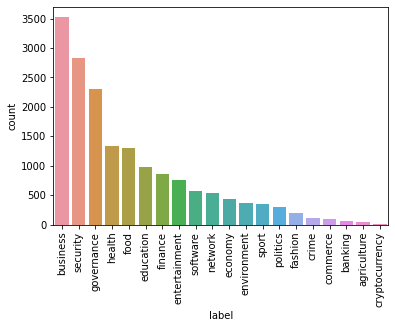

In [ ]:
from collections import Counter
a=pd.DataFrame(sorted(dict(Counter(df['gl'].sum())).items(), key=lambda i: i[1], reverse=True), columns=['label', 'count'])
sns.barplot(data=a, x='label', y='count')
plt.xticks(rotation=90)
plt.show()

# Classifier

## sklearn

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
X = df['page'].apply(lambda x: word_tokenize(x)); X

0        [search, hidden, unfortunately, version, hidde...
1        [link, list, hidden, deep, onion, link, list, ...
2                    [evil, search, anonymous, want, text]
3                  [green, machine, index, green, machine]
4        [world, welcome, place, site, news, waiting, o...
                               ...                        
25350                  [opal, mail, cash, embargo, vender]
25351                                      [sell, shipped]
25352                                     [related, meile]
25353    [best, selling, order, important, notice, read...
25354                   [data, policy, candidate, privacy]
Name: page, Length: 25355, dtype: object

In [ ]:
X.iloc[0]

['search',
 'hidden',
 'unfortunately',
 'version',
 'hidden',
 'network',
 'access',
 'hidden',
 'need',
 'browser',
 'bundle',
 'abuse',
 'material',
 'service',
 'report',
 'abuse',
 'material',
 'find',
 'index',
 'removed',
 'possible',
 'indexing',
 'information',
 'contribute',
 'source',
 'code',
 'project',
 'onion',
 'service']

In [ ]:
# def embed(x):
#     output = []
#     for i in x:
#         try:
#             output.append(w2v[i])
#         except:
#             continue
#     return output

In [ ]:
def embed(x):
    output = []
    for i in x:
        try:
            output.append(ft[i])
        except:
            continue
    return output

In [ ]:
# X1 = X.copy()

In [ ]:
X = X.apply(lambda x: np.sum(embed(x), axis=0))

In [ ]:
# X = np.stack(X)

In [ ]:
df

Unnamed: 0                                        folder_name  \
0               0                             msydqstlz2kzerdg.onion   
1               1  torlinksge6enmcyyuxjpjkoouw4oorgdgeo7ftnq3zodj...   
2               2                             hss3uro2hsxfogfq.onion   
3               3                             he22pncoselnm54h.onion   
4               4                             nare7pqnmnojs2pg.onion   
...           ...                                                ...   
25350       25350  es.answerszuvs3gg2l64e6hmnryudl5zgrmwm3vh65hzs...   
25351       25351                       et-ee.facebookcorewwwi.onion   
25352       25352                       et-ee.facebookcorewwwi.onion   
25353       25353                             etrrdbuorwng2hkw.onion   
25354       25354                       eu-es.facebookcorewwwi.onion   

                                 file_name  \
0          x1E4m82C6F4C185zF0ZB05E1CF.html   
1       10FBED7D1320DBBEJ10ADF0B41B3D.html   
2        9B00l8911012BD0279Ea98A5I3EF.html   
3         d84G5E9D2023uEA0CfF822A3K96.html   
4        0BbB8E8e3EqBA5C3CE819F2CAMF5.html   
...                                    ...   
25350     G8581C17Dt209FFB1u8B2918CB8.html   
25351       E2W07517A0F01DC1sSBC82WCD.html   
25352   16A8D4E8140t97C63E2E9DF83978C.html   
25353  96CBA1-8D28E0FE16u9E8BEDD7D924.html   
25354    16A616IB5Q97D58DEDEDE5CQB99A.html   

                                                    page  \
0      search hidden unfortunately version hidden net...   
1      link list hidden deep onion link list commerci...   
2                        evil search anonymous want text   
3                      green machine index green machine   
4      world welcome place site news waiting operator...   
...                                                  ...   
25350                      opal mail cash embargo vender   
25351                                       sell shipped   
25352                                      related meile   
25353  best selling order important notice ready take...   
25354                      data policy candidate privacy   

                                                 weights  \
0      {'search': 4.50586134212481, 'hidden': 29.7504...   
1      {'link': 36.406236587840674, 'list': 21.655367...   
2      {'evil': 9.986126464179273, 'search': 4.505861...   
3      {'green': 39.19669027050418, 'machine': 41.425...   
4      {'world': 5.408395532689193, 'welcome': 7.6187...   
...                                                  ...   
25350  {'opal': 11.822627731896393, 'mail': 8.5855885...   
25351  {'sell': 7.480235534449315, 'shipped': 10.2376...   
25352  {'related': 5.326201905776895, 'meile': 14.629...   
25353  {'best': 6.335361905062371, 'selling': 9.42052...   
25354  {'data': 3.3862136219921455, 'policy': 3.51039...   

                                        extracted_labels  \
0      ['material', 'abuse', 'service', 'hidden', 'un...   
1      ['polska', 'castellano', 'liberty', 'napoleon'...   
2                  ['evil', 'anonymous', 'text', 'want']   
3                          ['machine', 'green', 'index']   
4      ['explaining', 'operator', 'waiting', 'automat...   
...                                                  ...   
25350              ['opal', 'embargo', 'vender', 'cash']   
25351                                ['shipped', 'sell']   
25352                               ['meile', 'related']   
25353  ['shipping', 'original', 'order', 'delivery', ...   
25354                 ['candidate', 'privacy', 'policy']   

                                gl  
0              [network, business]  
1      [network, health, business]  
2                               []  
3                       [software]  
4        [entertainment, business]  
...                            ...  
25350                    [finance]  
25351                   [commerce]  
25352                           []  
25353         [commerce, business]  
25354       [securi

In [ ]:
# df['gl'] = df['gl'].apply(literal_return)

In [ ]:
data = list(zip(X, df['gl']))

In [ ]:
data

[(array([ 7.68407166e-01, -1.16138712e-01,  2.50993401e-01,  3.63258012e-02,
         -6.16144300e-01, -4.28217649e-01, -9.69885513e-02, -2.90181899e+00,
         -1.45723894e-02, -6.38613045e-01, -5.33956885e-01, -1.30861390e+00,
         -3.26436698e-01, -5.95862269e-01, -1.23039529e-01, -1.54950142e-01,
          2.05877233e+00, -2.07519889e-01,  2.08590508e+00,  1.51559979e-01,
          1.63128302e-01,  2.95425087e-01,  1.55058801e-01,  1.71596193e+00,
         -1.66874692e-01,  2.28333488e-01, -6.12451017e-01,  5.31985164e-01,
          6.12087846e-01,  4.13470000e-01, -1.22393690e-01,  2.85374373e-01,
         -5.41357160e-01, -1.68759596e+00,  7.74433494e-01, -3.31281424e-01,
          1.03208914e-01,  3.39159518e-01, -2.29229406e-02, -2.67076582e-01,
          3.99193883e-01, -2.80371475e+00, -2.46476978e-01, -2.66997993e-01,
         -1.85178295e-01, -1.44546509e-01,  6.18568599e-01, -9.01600122e-02,
          2.08558172e-01,  3.43124002e-01,  2.30457708e-01, -2.08861321e-01,

In [ ]:
data = pd.DataFrame(data, columns=['Embedding', 'Label(s)'])

In [ ]:
data

Embedding  \
0      [0.76840717, -0.11613871, 0.2509934, 0.0363258...   
1      [2.890185, -4.1446576, 3.1033788, 1.0723336, -...   
2      [0.1165515, 0.19172181, 0.1057275, -0.0282612,...   
3      [0.074643604, -0.055094004, -0.009803, 0.11662...   
4      [0.22790053, -0.5708479, 0.45950538, 0.2074110...   
...                                                  ...   
25350  [0.08657674, 0.246323, -0.096429005, 0.0800587...   
25351  [0.039814, 0.27851, -0.075848, 0.01477331, 0.0...   
25352  [-0.023037, 0.011132, 0.016314, 0.0027494, 0.0...   
25353  [-0.29106417, 0.110437, -0.055555783, -0.10639...   
25354  [-0.030832998, -0.11639801, -0.17639899, 0.134...   

                          Label(s)  
0              [network, business]  
1      [network, health, business]  
2                               []  
3                       [software]  
4        [entertainment, business]  
...                            ...  
25350                    [finance]  
25351                   [commerce]  
25352                           []  
25353         [commerce, business]  
25354       [security, governance]  

[25355 rows x 2 columns]

In [ ]:
# data.to_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/toUse(Embedding+Label(s)).csv')

In [ ]:
data = data[data.apply(lambda row: len(row['Label(s)']) > 0 , axis=1)]

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data

Embedding  \
0      [0.76840717, -0.11613871, 0.2509934, 0.0363258...   
1      [2.890185, -4.1446576, 3.1033788, 1.0723336, -...   
2      [0.074643604, -0.055094004, -0.009803, 0.11662...   
3      [0.22790053, -0.5708479, 0.45950538, 0.2074110...   
4      [-0.15804043, -0.08026139, -0.09530172, 0.0048...   
...                                                  ...   
10145  [0.07932, -0.0160948, -0.12886, 0.044198, -0.0...   
10146  [0.08657674, 0.246323, -0.096429005, 0.0800587...   
10147  [0.039814, 0.27851, -0.075848, 0.01477331, 0.0...   
10148  [-0.29106417, 0.110437, -0.055555783, -0.10639...   
10149  [-0.030832998, -0.11639801, -0.17639899, 0.134...   

                          Label(s)  
0              [network, business]  
1      [network, health, business]  
2                       [software]  
3        [entertainment, business]  
4             [commerce, business]  
...                            ...  
10145                   [security]  
10146                    [finance]  
10147                   [commerce]  
10148         [commerce, business]  
10149       [security, governance]  

[10150 rows x 2 columns]

In [ ]:
X = np.stack(data['Embedding'])
y = data['Label(s)']

In [ ]:
count_classes = len(set(y.sum()))

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y.sum())
y = y.apply(le.transform)

In [ ]:
mlb = MultiLabelBinarizer()

In [ ]:
y = mlb.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
# [le.inverse_transform(i) for i in mlb.inverse_transform(clf.predict(X_test))]

In [ ]:
print(classification_report(y_test, clf.predict(X_test), target_names=le.classes_))

                precision    recall  f1-score   support

   agriculture       0.92      0.85      0.88        13
       banking       0.21      0.60      0.31        15
      business       0.91      0.92      0.91       870
      commerce       0.26      0.58      0.36        24
         crime       0.18      0.60      0.28        15
cryptocurrency       0.03      0.33      0.05         3
       economy       0.70      0.82      0.76       114
     education       0.70      0.77      0.73       227
 entertainment       0.68      0.86      0.76       194
   environment       0.68      0.66      0.67        85
       fashion       0.40      0.66      0.50        44
       finance       0.77      0.85      0.81       231
          food       0.83      0.91      0.87       328
    governance       0.90      0.96      0.93       570
        health       0.75      0.79      0.77       316
       network       0.63      0.76      0.69       144
      politics       0.56      0.67      0.61  

## TensorFlow

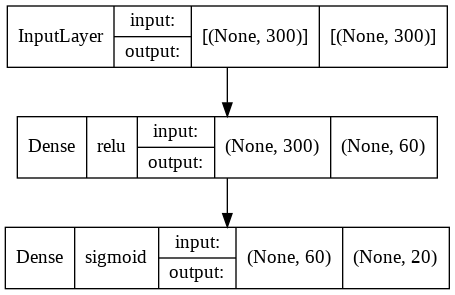

In [ ]:
model = Sequential(name='classifier')
model.add(Dense(units=60, input_dim=300, activation='relu'))
model.add(Dense(units=count_classes, activation='sigmoid', name='output'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tf.keras.utils.plot_model(model, show_layer_activations=True, show_layer_names=False, show_shapes=True)

In [ ]:
import itertools
a = list(itertools.chain.from_iterable(mlb.inverse_transform(y_train)))

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=list(range(0,count_classes)), y=a)

In [ ]:
cw = {i: v for i, v in enumerate(class_weights)}

In [ ]:
modelHist = model.fit(
    X_train, y_train, epochs=100, class_weight=cw,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
    ]
)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 1.0139 - accuracy: 0.0294
Epoch 2/100
238/238 [==============================] - 1s 3ms/step - loss: 0.5257 - accuracy: 0.0236
Epoch 3/100
238/238 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.0868
Epoch 4/100
238/238 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.0842
Epoch 5/100
238/238 [==============================] - 1s 3ms/step - loss: 0.3670 - accuracy: 0.1988
Epoch 6/100
238/238 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.3096
Epoch 7/100
238/238 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.5075
Epoch 8/100
238/238 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.4610
Epoch 9/100
238/238 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.5289
Epoch 10/100
238/238 [==============================] - 1s 3ms/step - loss: 0.2407 - accura

In [ ]:
# plt.subplot(2,1,1)
# plt.plot(modelHist.history['accuracy'])
# plt.plot(modelHist.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.subplot(2,1,2)
# plt.plot(modelHist.history['loss'])
# plt.plot(modelHist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')


# plt.tight_layout(1)
# plt.savefig('model_metrics.png', bbox_inches='tight')

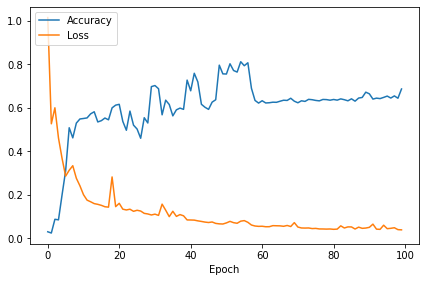

In [ ]:
plt.plot(modelHist.history['accuracy'])
plt.plot(modelHist.history['loss'])
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')


plt.tight_layout(1)
plt.savefig('model_metrics.png', bbox_inches='tight')

In [ ]:
print(classification_report(y_test, np.round(model.predict(X_test)), target_names=le.classes_))

                precision    recall  f1-score   support

   agriculture       0.86      0.92      0.89        13
       banking       0.20      0.87      0.33        15
      business       0.97      0.87      0.92       870
      commerce       0.81      0.54      0.65        24
         crime       0.27      0.20      0.23        15
cryptocurrency       0.00      0.00      0.00         3
       economy       0.81      0.82      0.81       114
     education       0.84      0.76      0.80       227
 entertainment       0.90      0.77      0.83       194
   environment       0.75      0.51      0.61        85
       fashion       0.74      0.39      0.51        44
       finance       0.92      0.85      0.88       231
          food       0.97      0.95      0.96       328
    governance       0.97      0.93      0.95       570
        health       0.84      0.78      0.81       316
       network       0.81      0.66      0.73       144
      politics       0.94      0.58      0.72  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# examples

In [ ]:
df3 = df[['file_name','page','gl']].iloc[110:120,:]

In [ ]:
X = df3['page'].apply(lambda x: word_tokenize(x))

In [ ]:
X = X.apply(lambda x: np.sum(embed(x), axis=0))

In [ ]:
data = list(zip(X, df3['gl'],df3['file_name']))

In [ ]:
data = pd.DataFrame(data, columns=['Embedding', 'Label(s)','file_name'])

In [ ]:
data = data[data.apply(lambda row: len(row['Label(s)']) > 0 , axis=1)]
data = data[data.apply(lambda row: len(row['Label(s)']) > 0 , axis=1)]

In [ ]:
data.reset_index()

index                                          Embedding  \
0      0  [0.0028923452, -0.6115271, 0.68309987, 0.30168...   
1      1  [0.18822446, 0.15444794, 1.3181129, 0.04268066...   
2      2  [1.0100831, -0.918976, 2.5818098, -0.2523942, ...   
3      3  [0.7274072, -2.2126632, 1.1860937, 0.20006838,...   
4      4  [0.21584663, -2.2731063, 1.1951588, 0.05435780...   
5      5  [-0.012748919, -1.3112668, 0.9236159, 0.618219...   
6      6  [2.045387, -7.2444825, 9.690802, 4.737909, -9....   
7      7  [0.102425, -0.981458, 0.28122857, 0.04135889, ...   
8      8  [2.9284272, -3.4771094, 1.9834895, 2.0054271, ...   

                                            Label(s)  \
0                [entertainment, network, education]   
1                                  [security, sport]   
2                      [software, network, business]   
3      [security, software, entertainment, business]   
4  [security, entertainment, software, network, b...   
5                  [environment, software, business]   
6  [security, software, network, entertainment, e...   
7                                 [network, finance]   
8  [economy, security, entertainment, network, bu...   

                              file_name  
0  1305D3CA29B315C50FE1D4A3E519rD9.html  
1  14BC51DC2B7CBFA7C1BB2E2B2C1AC96.html  
2    3DAB13J_3DC3CB8Bl85FF9B821DCD.html  
3    1986ECBD8Az28EDFA0DB097BFC5FD.html  
4         BD06BA-D78xBF702C90AwACz.html  
5     10OV9E1E1E072B95915EF0CB1177.html  
6    A71A3DA1DBE7s9692A322BBE056BF.html  
7     DFAD19F6E9AeE1B61097ew7FBE18.html  
8     2BD4ACCAA1B64BC40D2318F601D7.html

In [ ]:
X = np.stack(data['Embedding'])
y = data['Label(s)']

In [ ]:
np.round(model.predict(X))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [ ]:
output_tokens = [
    'agriculture',
    'banking',
    'blockchain',
    'business',
    'crime',
    'cryptocurrency',
    'economy',
    'education',
    'entertainment',
    'environment',
    'fashion',
    'finance',
    'food',
    'governance',
    'health',
    'network',
    'politics',
    'security',
    'software',
    'sport',
    'technology',
    'web',
]